In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
dataXtrain=pd.read_csv(r"C:\Users\Blez cherian\Downloads\X_train.csv")
dataXtrain

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0
...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0


In [3]:
dataXtrain.shape

(4960, 10)

In [4]:
dataXtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4960 non-null   int64  
 6   fuelType      4960 non-null   object 
 7   tax           4960 non-null   float64
 8   mpg           4960 non-null   float64
 9   engineSize    4960 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 387.6+ KB


In [5]:
dataYtrain=pd.read_csv(r"C:\Users\Blez cherian\Downloads\y_train.csv")
dataYtrain

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
...,...,...
4955,16898,17999
4956,14416,28900
4957,15453,8998
4958,14666,23198


In [6]:
dataYtrain.drop(['carID'],axis=1,inplace=True)

In [7]:
dataXtest=pd.read_csv(r"C:\Users\Blez cherian\Downloads\X_test.csv")
dataXtest

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0
...,...,...,...,...,...,...,...,...,...,...
2667,19618,audi,A7,2015,Semi-Auto,21100,Petrol,325.0,29.7,4.0
2668,19620,merc,CLS Class,2015,Automatic,60972,Diesel,160.0,52.3,3.0
2669,19626,ford,Puma,2020,Manual,4111,Petrol,145.0,50.4,1.0
2670,19630,merc,CLA Class,2016,Automatic,25726,Petrol,200.0,41.5,2.0


In [8]:
dataXtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         2672 non-null   int64  
 1   brand         2672 non-null   object 
 2   model         2672 non-null   object 
 3   year          2672 non-null   int64  
 4   transmission  2672 non-null   object 
 5   mileage       2672 non-null   int64  
 6   fuelType      2672 non-null   object 
 7   tax           2672 non-null   float64
 8   mpg           2672 non-null   float64
 9   engineSize    2672 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 208.9+ KB


In [9]:
dataYtest=pd.read_csv(r"C:\Users\Blez cherian\Downloads\y_test.csv")
dataYtest

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000
...,...,...
2667,19618,28990
2668,19620,17450
2669,19626,21995
2670,19630,18700


In [10]:
dataYtest.drop(['carID'],axis=1,inplace=True)

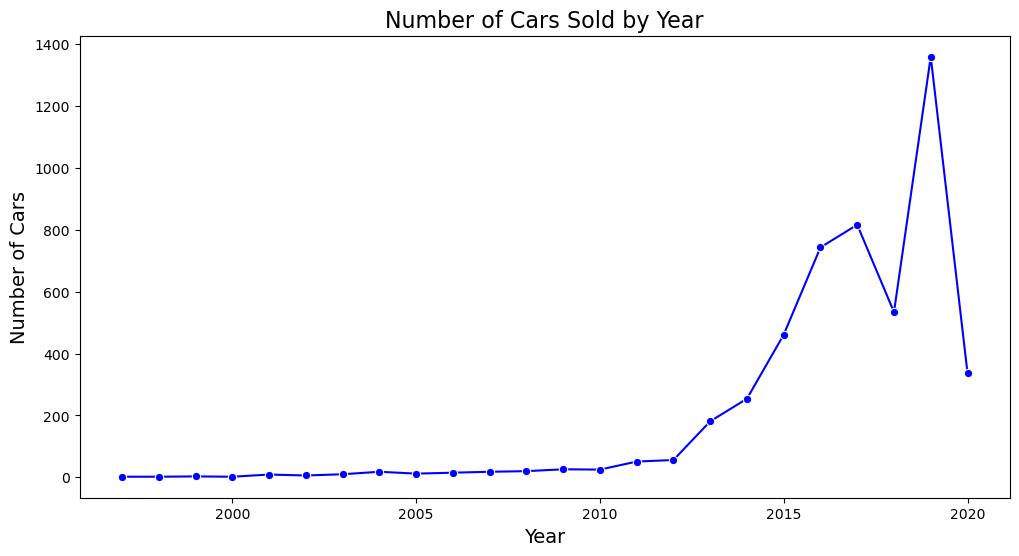

In [11]:
plt.figure(figsize=(12, 6))
yearly_sales = dataXtrain['year'].value_counts().sort_index()
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', color='b')
plt.title('Number of Cars Sold by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.show()

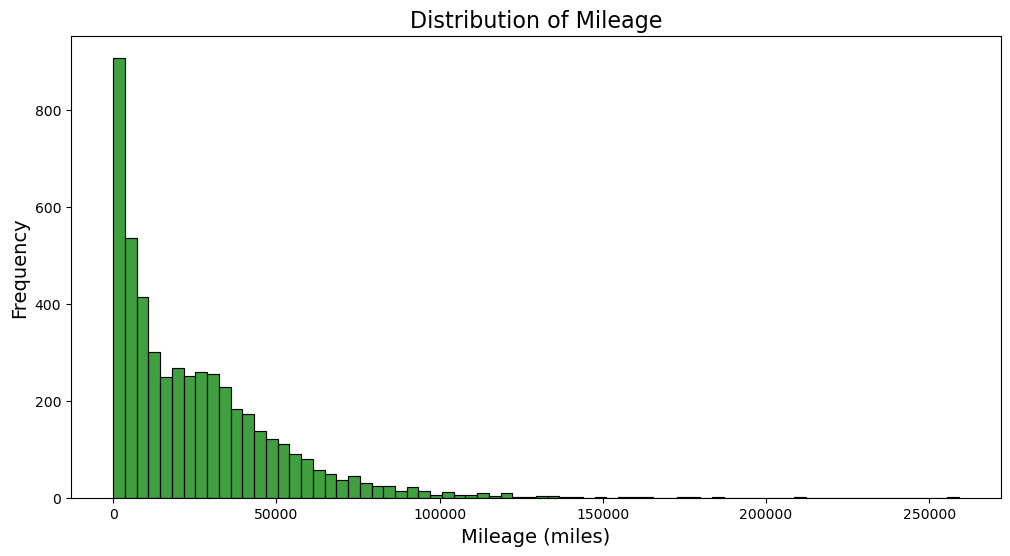

In [12]:
# 2. Distribution of Mileage
plt.figure(figsize=(12, 6))
sns.histplot(dataXtrain['mileage'],color='g')
plt.title('Distribution of Mileage', fontsize=16)
plt.xlabel('Mileage (miles)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

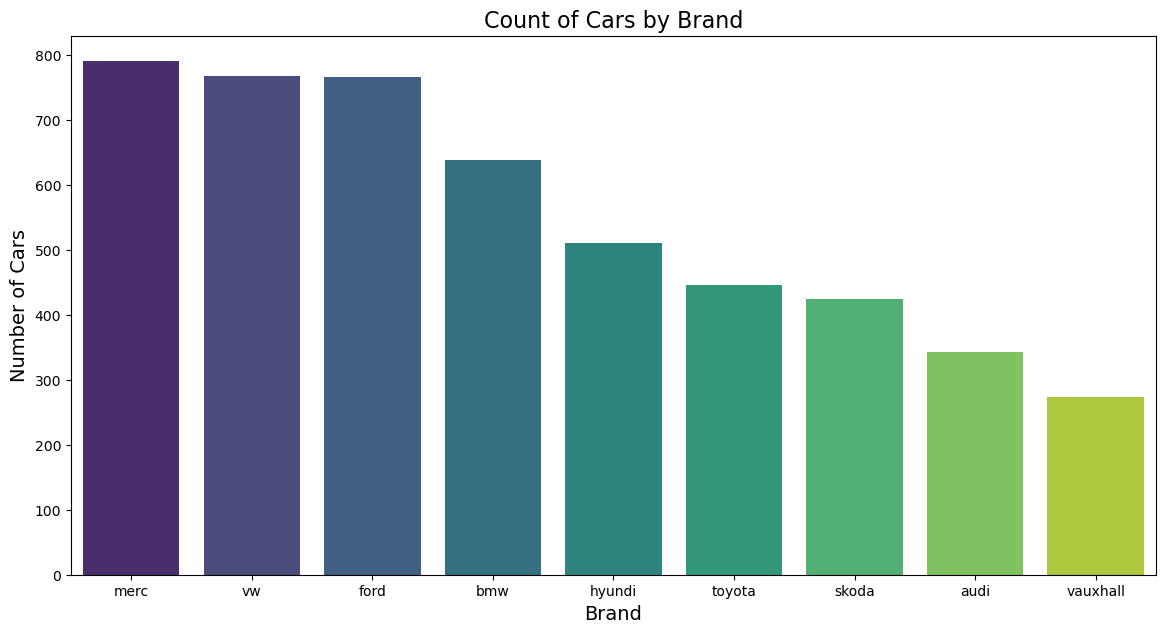

In [13]:
# 3. Bar plot for Brand-wise Car Count
plt.figure(figsize=(14, 7))
brand_counts = dataXtrain['brand'].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Count of Cars by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.show()

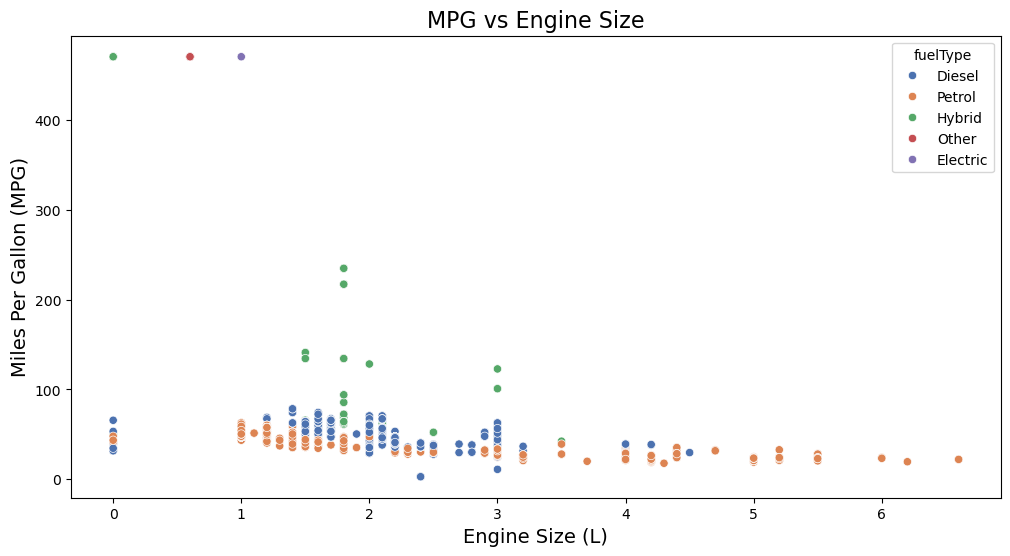

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataXtrain, x='engineSize', y='mpg', hue='fuelType', palette='deep')
plt.title('MPG vs Engine Size', fontsize=16)
plt.xlabel('Engine Size (L)', fontsize=14)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=14)
plt.show()

In [15]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()

In [16]:
dataXtrain['brand']=le1.fit_transform(dataXtrain['brand'])
dataXtrain['model']=le2.fit_transform(dataXtrain['model'])
dataXtrain['transmission']=le3.fit_transform(dataXtrain['transmission'])
dataXtrain['fuelType']=le4.fit_transform(dataXtrain['fuelType'])


In [17]:
dataXtrain

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,3,69,2019,3,4223,0,145.0,39.8,2.2
1,17314,7,30,2015,1,47870,0,125.0,60.1,2.0
2,12342,0,58,2019,0,5151,4,145.0,29.1,2.9
3,13426,8,71,2016,0,20423,0,30.0,57.6,2.0
4,16004,5,70,2020,3,3569,4,145.0,47.1,1.0
...,...,...,...,...,...,...,...,...,...,...
4955,16898,4,26,2015,0,24314,0,125.0,56.6,2.1
4956,14416,1,0,2017,0,18000,0,145.0,51.4,3.0
4957,15453,8,11,2015,1,84932,0,30.0,60.1,2.0
4958,14666,0,3,2017,3,30150,0,145.0,62.8,3.0


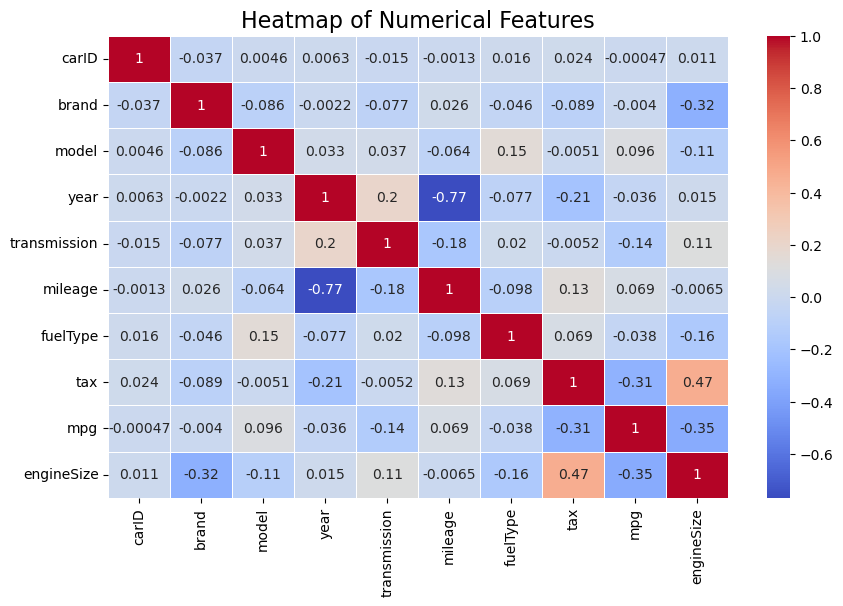

In [18]:
plt.figure(figsize=(10, 6))
correlation_matrix = dataXtrain.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Features', fontsize=16)
plt.show()

In [19]:
dataXtest['brand']=le1.transform(dataXtest['brand'])
dataXtest['model']=le2.transform(dataXtest['model'])
dataXtest['transmission']=le3.transform(dataXtest['transmission'])
dataXtest['fuelType']=le4.transform(dataXtest['fuelType'])

LINEAR REGRESSION

In [20]:
model=LinearRegression()
model.fit(dataXtrain,dataYtrain)

LinearRegression()

In [21]:
model.predict((dataXtest))

array([[ 35400.17921278],
       [ 27464.26286089],
       [ 39194.18200804],
       ...,
       [ 19179.18464293],
       [ 18143.23184429],
       [-15899.03289525]])

In [22]:
dataYtest

,price
0,38000
1,23495
2,59999
3,16713
4,46000
...,...
2667,28990
2668,17450
2669,21995
2670,18700


In [23]:
model.score(dataXtest,dataYtest)

0.6584167352688378

In [24]:
model.score(dataXtrain,dataYtrain)

0.6796768186368407

DECISION TTREE

In [25]:
from sklearn.tree import DecisionTreeRegressor


In [26]:
dec_model=DecisionTreeRegressor()
dec_model.fit(dataXtrain,dataYtrain)

DecisionTreeRegressor()

In [27]:
ypred1=dec_model.predict(dataXtest)
ypred1

array([38000., 22795., 57526., ..., 19991., 28944.,  2990.])

In [28]:
dataYtest

,price
0,38000
1,23495
2,59999
3,16713
4,46000
...,...
2667,28990
2668,17450
2669,21995
2670,18700


In [29]:
print(dec_model.score(dataXtest,dataYtest)*100)


89.80720626724118


In [30]:
print(dec_model.score(dataXtrain,dataYtrain)*100)

100.0


RANDOM FOREST REGRESSOR

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rand_model=RandomForestRegressor()
rand_model.fit(dataXtrain,dataYtrain)

RandomForestRegressor()

In [33]:
ypred2=rand_model.predict(dataXtest)

In [34]:
ypred2

array([38772.34, 23672.48, 57473.25, ..., 21035.57, 25578.58,  3009.  ])

In [35]:
dataYtest

,price
0,38000
1,23495
2,59999
3,16713
4,46000
...,...
2667,28990
2668,17450
2669,21995
2670,18700


In [36]:
print(rand_model.score(dataXtrain,dataYtrain))


0.9930523460312687


In [37]:
print(rand_model.score(dataXtest,dataYtest))

0.9523589335812533


KNN REGRESSOR

In [38]:
from sklearn.neighbors import KNeighborsRegressor


In [39]:
regressor=KNeighborsRegressor(n_neighbors=5)
regressor.fit(dataXtrain,dataYtrain)

KNeighborsRegressor()

In [40]:
ypred3=regressor.predict(dataXtest)
ypred3

array([[26184. ],
       [11326. ],
       [30146.8],
       ...,
       [30786. ],
       [17780.8],
       [ 8309.8]])

In [41]:
dataYtest

,price
0,38000
1,23495
2,59999
3,16713
4,46000
...,...
2667,28990
2668,17450
2669,21995
2670,18700


In [42]:
print(regressor.score(dataXtrain,dataYtrain))


0.4433573561348615


In [43]:
print(regressor.score(dataXtest,dataYtest))


0.2037130086623553


ADABOOST  REGRESSOR

In [44]:
from sklearn.ensemble import AdaBoostRegressor


In [45]:
model5=AdaBoostRegressor(n_estimators=50,learning_rate=0.3,random_state=1)

In [46]:
model5.fit(dataXtrain,dataYtrain)

AdaBoostRegressor(learning_rate=0.3, random_state=1)

In [47]:
print(model5.score(dataXtest,dataYtest))


0.758300888283446


In [48]:
print(model5.score(dataXtrain,dataYtrain))


0.7645569631866389


In [49]:
model5.predict(dataXtest)

array([30507.72715736, 27996.56121045, 48244.25608011, ...,
       27638.88742964, 15256.31278749, 13660.57560976])

In [50]:
dataYtest

,price
0,38000
1,23495
2,59999
3,16713
4,46000
...,...
2667,28990
2668,17450
2669,21995
2670,18700


GRADIENTBOOST

In [51]:
from sklearn.ensemble import GradientBoostingRegressor


In [52]:
model6=GradientBoostingRegressor(n_estimators=250,random_state=1)

In [53]:
model6.fit(dataXtrain,dataYtrain)

GradientBoostingRegressor(n_estimators=250, random_state=1)

In [54]:
print(model6.score(dataXtest,dataYtest))


0.9437904958126754


In [55]:
print(model6.score(dataXtrain,dataYtrain))

0.9650389366413189


XG BOOST

In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
from xgboost import XGBRegressor

In [58]:
model7=XGBRegressor(n_estimators=250,random_state=1)

In [59]:
model7.fit(dataXtrain,dataYtrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [60]:
print(model7.score(dataXtest,dataYtest))


0.9396832553166748


In [61]:
print(model7.score(dataXtrain,dataYtrain))

0.9990709065515083


SUPPORT VECTOR MACHINE

In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [63]:
#model=SVR()

In [64]:
#dataXtrain=np.asarray(dataXtrain)
#dataYtrain=np.asarray(dataYtrain)

In [65]:
#parameters={
#    'kernel':['linear','poly','rbf','sigmoid'],
 #   'C':[1,5,10,20]
    
#}

In [66]:
#GV=GridSearchCV(model,parameters,cv=5)

In [67]:
#GV.fit(dataXtrain,dataYtrain)

In [68]:
#GV.best_params_

In [69]:
model8=SVR()

In [70]:
model8.fit(dataXtrain,dataYtrain)

SVR()

In [71]:
print(model8.score(dataXtest,dataYtest))


-0.044979896899070004


In [72]:
print(model8.score(dataXtrain,dataYtrain))

-0.03708571916000225


In [73]:
df=pd.DataFrame({'test accuracy':[65,92,95,20,75,94,93],"train accuracy":[67,100,99,44,76,96,99]},index=["Linear Regression","DecisionTree Regression","Randomforest Regression","KNN Regression","Adaboost regressor","Gragientboost regressor","XG boost regressor"])
df

,test accuracy,train accuracy
Linear Regression,65,67
DecisionTree Regression,92,100
Randomforest Regression,95,99
KNN Regression,20,44
Adaboost regressor,75,76
Gragientboost regressor,94,96
XG boost regressor,93,99


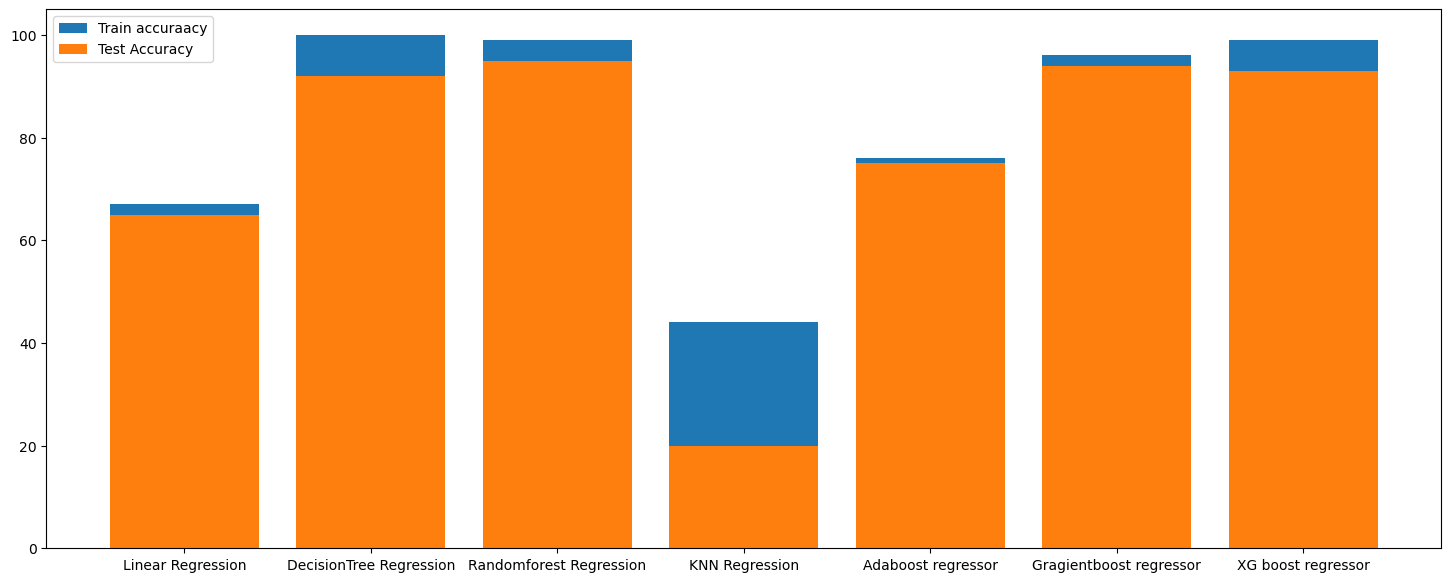

In [74]:
plt.figure(figsize=(18,7))
plt.bar(df.index,df["train accuracy"],label="Train accuraacy")
plt.bar(df.index,df["test accuracy"],label="Test Accuracy")
plt.legend()
plt.show()